# Study Point
- matplot의 line그래프를 대상으로 챠트의 각 요소를 익힌다
- bar, pie, histogram, scatter 그래프를 그려본다
- subplot을 이용해서 여러 개의 그래프를 한장에 그려본다
- pandas 패키지의 DataFrame을 그래프로 그려본다
- seaborn패키지를 이용해서 좀 더 다양한 그래프를 그려본다
- 지도정보를 이용해서 지도에 시각화를 해 본다

참고자료 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

# <font color='green'>요 약</font>
본 연구의 결과로 통합식품안전정보망의 정보 및 외부 기후정보를 활용하여 업소의 기본정보, 과거 행정처분자료를 바탕으로 <font color='red'>단속 필요성 점수를 산출하여 부적합업소를 적발하는 확률을 제공</font>하였다.  <font color='red'>부적합업소를 적발하는 확률이란 업소의 특성(영업일수, 종업원 수, HACCP, 면적, 과거 5년간 부적합률, 위생점검 당시의 평균기온과 습도 등)을 통해 해당 업체에 단속 나갔을 경우 ‘부적합’이라고 예측할 확률이다.</font> 식약처가 제공한 축산물 분야 총 12개 세부업종(도축업과 집유업은 제외)을 대상으로 결측치, 이상치 등의 자료를 처리한 후 위생점검의 단속 활동의 특성을 충분히 반영하기 위해 패널데이터형식으로 자료를 재구성하여 예측모형의 성과를 극대화하였다. 위생점검 결과에 영향을 미치는 변수로 영업일수, 대표자 및 주소 변경 여부, 과거 3년간 매출액 추이 백분위 등의 파생변수를 반영하였다. 2019.6.30.기준으로 축산물가공업과 식육포장처리업은 65.3%를 단속하였고 축산물판매업과 식육즉석판매가공업은 40.0%를 단속하였다. 위생점검을 받지 않은 미단속업체에 대해서는 1회의 단속활동 데이터를 바탕으로 기계학습을 수행하여 적발확률을 산출하였다. 

In [2]:
import os
#os.chdir('D:/축산물과제/2차 축산물/script')

#from livestock import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# ppt이미지 파일 불러오기
from IPython.display import Image
width = 700
height = 300

import os
import pandas as pd
import time
from datetime import datetime
import folium


%matplotlib inline
import matplotlib.pylab as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# Basic
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
import pickle
import os
import math 


#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno

# 통합망데이터 추출  데이터 정제

value counts
- A. normalize = True: if you want to check the frequency instead of counts.
- B. dropna = False: if you also want to include missing values in the stats.
- C. df['c'].value_counts().reset_index(): if you want to convert the stats table into a pandas dataframe and manipulate it
- D. df['c'].value_counts().reset_index().sort_values(by='index') : show the stats sorted by distinct values in column ‘c’ instead of counts. (Update 2019.4.18 — for D. above, Hao Yang points out a simpler way without .reset_index(): df['c'].value_counts().sort_index())

## 데이터 추출(Data Extraction)

## matplotlib - Line

Text(0.5, 1.0, 'math.cos()')

Text(0.5, 0, 'X = -2*pie ~ +2**pie')

Text(0, 0.5, 'Y = cosine(X)')

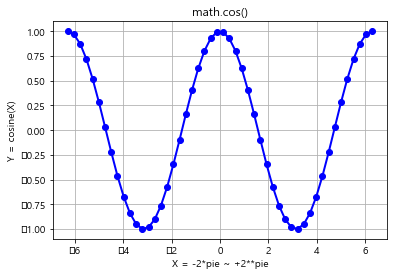

In [3]:
in_array = np.linspace(-(2 * np.pi), 2 * np.pi, 50) 
out_array = [] 

for i in range(len(in_array)): 
    out_array.append(math.cos(in_array[i])) 
    i += 1
  
plt.plot(in_array, out_array, color = 'blue', marker = "o")  
plt.title("math.cos()")  
plt.xlabel("X = -2*pie ~ +2**pie")  
plt.ylabel("Y = cosine(X)")  
plt.show()  

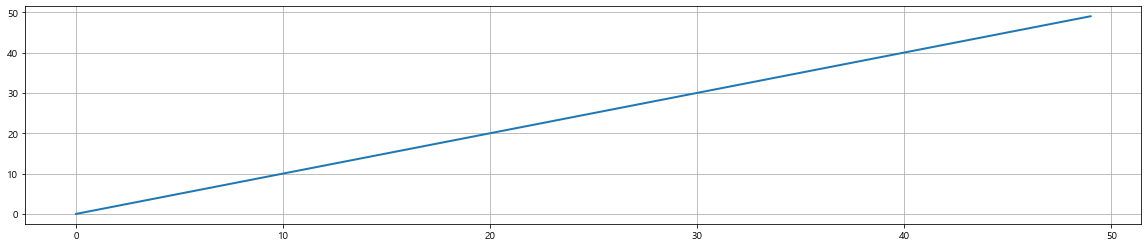

In [4]:
import math
plt.rcParams["figure.figsize"] = (20,4)

a = np.arange(0, 50); b = in_array; c = out_array; d = a+b+c

plt.plot(a)

Text(0.5, 0, 'X축')

Text(0, 0.5, 'y축')

Text(0.5, 1.0, 'Simple Graph')

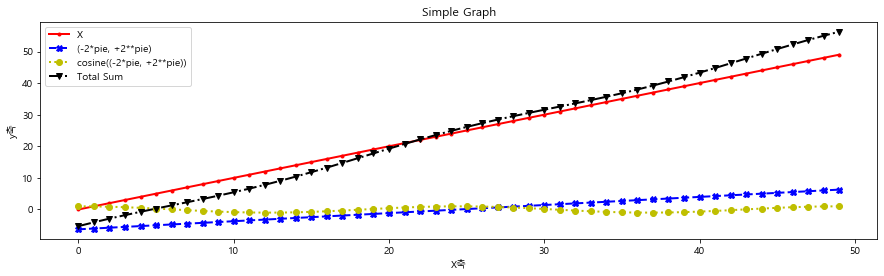

In [5]:
plt.rcParams["figure.figsize"] = (15,4)
fix, ax = plt.subplots()
ax.plot(a, 'r.-', label='X')
ax.plot(b, 'bX--', label='(-2*pie, +2**pie)')
ax.plot(c, 'yo:', label='cosine((-2*pie, +2**pie))')
ax.plot(d, 'kv-.', label='Total Sum')
ax.set_xlabel('X축')
ax.set_ylabel('y축')
ax.set_title('Simple Graph')
ax.grid()
ax.legend()

plt.show()

### matplotlib 참고
https://matplotlib.org/3.1.0/index.html

<BarContainer object of 50 artists>

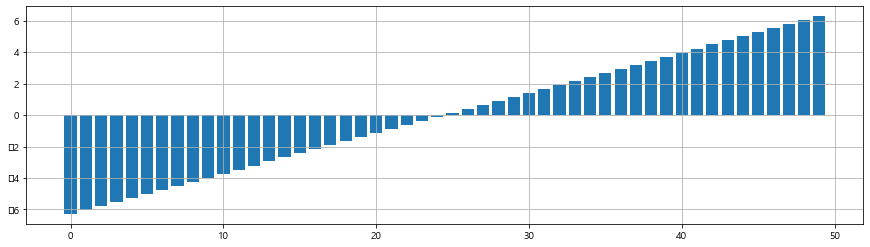

In [6]:
plt.bar(a, b)

<BarContainer object of 50 artists>

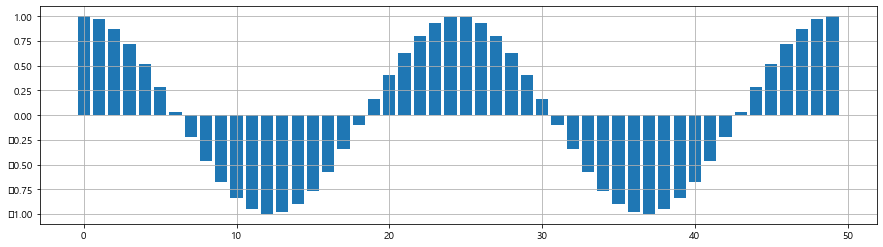

In [7]:
plt.bar(a, c)

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

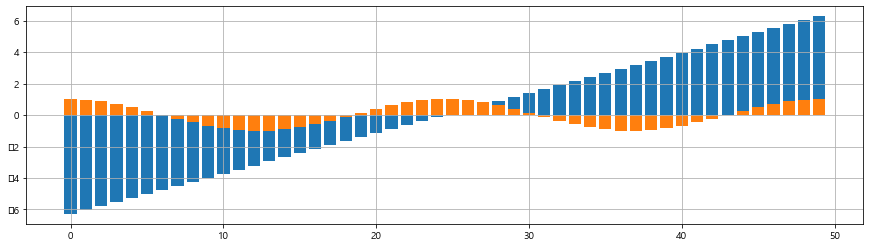

In [8]:
plt.bar(a, b)
plt.bar(a, c)

<BarContainer object of 25 artists>

<BarContainer object of 25 artists>

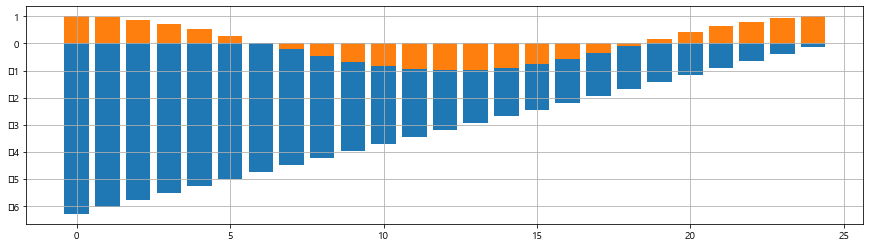

In [9]:
plt.bar(a[0:25], b[0:25])
plt.bar(a[0:25], c[0:25])

## legend

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

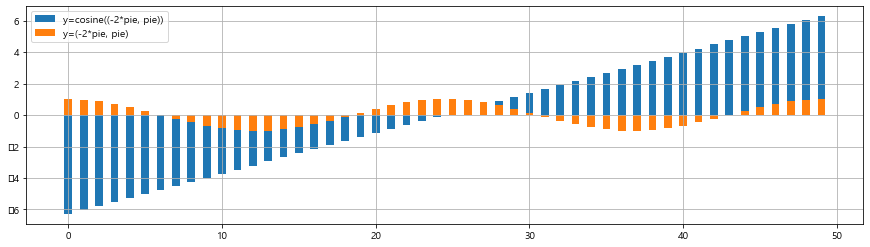

In [10]:
bar_width = 0.5
plt.bar(a, b, bar_width, label='y=cosine((-2*pie, pie))')
plt.bar(a, c, bar_width, label='y=(-2*pie, pie)')
plt.legend()
plt.show()

## matplotlib - Pie

## pie chart

## matplotlib - Scattet

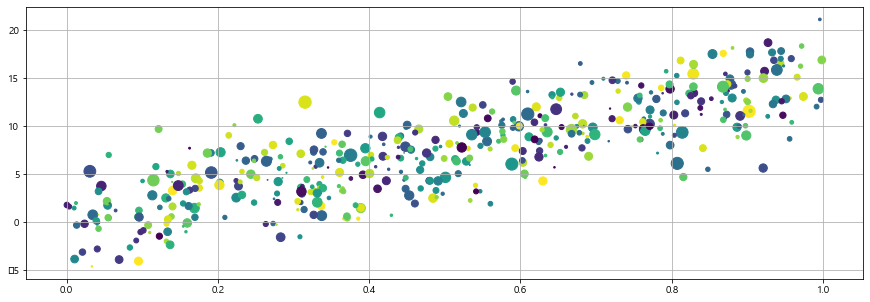

In [12]:
plt.rcParams["figure.figsize"] = (15,5)
np.random.seed(12)
N=1000
colors = np.random.rand(N)
areas = 50*np.random.randn(N)
X = np.random.rand(N)
y= 15*X + 3*np.random.randn(N)

plt.scatter(X,y, s= areas, c=colors)
plt.show()

(array([[12., 29., 26.,  7.,  1.,  1.,  0.,  0.,  0.,  0.],
        [ 9., 25., 35., 31., 13.,  4.,  0.,  0.,  0.,  0.],
        [ 1.,  6., 26., 42., 21.,  9.,  0.,  0.,  0.,  0.],
        [ 0.,  7., 31., 39., 33., 12.,  6.,  0.,  0.,  0.],
        [ 0.,  1.,  7., 25., 35., 21.,  7.,  0.,  1.,  0.],
        [ 0.,  0.,  2., 13., 25., 37., 15.,  7.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 19., 39., 31.,  8.,  1.,  0.],
        [ 0.,  1.,  0.,  1.,  7., 33., 29., 23.,  6.,  0.],
        [ 0.,  0.,  0.,  3.,  4., 18., 29., 29.,  9.,  1.],
        [ 0.,  0.,  0.,  0.,  2.,  5., 25., 18., 23.,  7.]]),
 array([4.58349557e-04, 1.00243808e-01, 2.00029266e-01, 2.99814724e-01,
        3.99600182e-01, 4.99385640e-01, 5.99171098e-01, 6.98956557e-01,
        7.98742015e-01, 8.98527473e-01, 9.98312931e-01]),
 array([-4.75622893, -2.1698173 ,  0.41659433,  3.00300597,  5.5894176 ,
         8.17582923, 10.76224086, 13.3486525 , 15.93506413, 18.52147576,
        21.10788739]),
 <matplotlib.collections.Qu

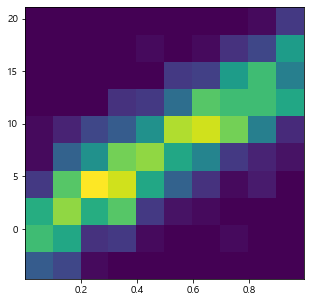

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist2d(X,y)
plt.show()

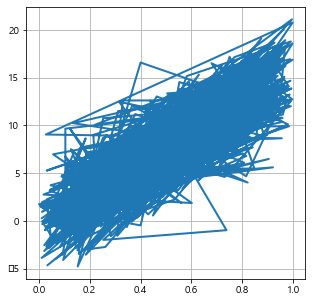

In [14]:
plt.plot(X,y)
plt.show()

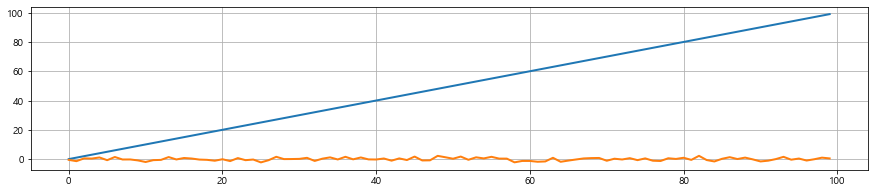

In [15]:
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(np.arange(100))
plt.plot(np.random.randn(100))
plt.show()

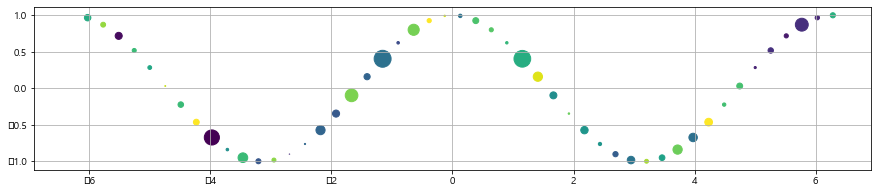

In [16]:
N=len(a)
colors = np.random.rand(N)
areas = 50*np.random.randn(N)**2

plt.scatter(b,c, s= areas, c=colors)
plt.show()

## matplotlib - Histogram

(array([  3.,  13.,  35., 134., 207., 265., 207., 103.,  25.,   8.]),
 array([-8.55339725, -5.11477911, -1.67616097,  1.76245717,  5.20107531,
         8.63969346, 12.0783116 , 15.51692974, 18.95554788, 22.39416602,
        25.83278416]),
 <a list of 10 Patch objects>)

(array([  1.,   2.,   3.,  10.,  13.,  22.,  41.,  93., 106., 101., 129.,
        136., 109.,  98.,  71.,  32.,  16.,   9.,   3.,   5.]),
 array([-8.55339725, -6.83408818, -5.11477911, -3.39547004, -1.67616097,
         0.0431481 ,  1.76245717,  3.48176624,  5.20107531,  6.92038438,
         8.63969346, 10.35900253, 12.0783116 , 13.79762067, 15.51692974,
        17.23623881, 18.95554788, 20.67485695, 22.39416602, 24.11347509,
        25.83278416]),
 <a list of 20 Patch objects>)

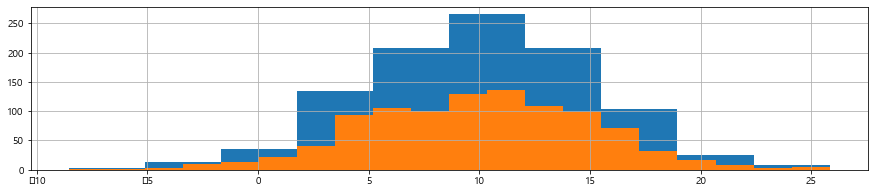

In [18]:
plt.rcParams["figure.figsize"] = (15,3)
np.random.seed(12)
N=1000
X = 10 + 5*np.random.randn(N)
plt.hist(X)
plt.hist(X, 20)
plt.show()

In [19]:
N = 2000
colors =['red', 'blue']
X1 = 10 + 5*np.random.randn(N).reshape(N,1)
X2 = -10 + 10*np.random.randn(N).reshape(N,1)
X = np.concatenate((X1, X2), axis =1)

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   3.,  13.,  25.,  41., 117., 190., 249., 345., 290., 254.,
         198., 141.,  70.,  39.,  13.,   9.,   3.]),
  array([  1.,   0.,   0.,   0.,   0.,   1.,   4.,   3.,  10.,  11.,  22.,
          30.,  42.,  57.,  75.,  84., 121., 127., 125., 156., 158., 149.,
         163., 101., 135.,  95.,  86.,  66.,  55.,  45.,  25.,  14.,  16.,
           8.,   8.,   4.,   0.,   1.,   0.,   2.])],
 array([-50.11049238, -48.18964894, -46.26880551, -44.34796207,
        -42.42711863, -40.50627519, -38.58543175, -36.66458831,
        -34.74374487, -32.82290143, -30.90205799, -28.98121455,
        -27.06037111, -25.13952767, -23.21868423, -21.29784079,
        -19.37699735, -17.45615392, -15.53531048, -13.61446704,
        -11.6936236 ,  -9.77278016,  -7.85193672,  -5.93109328,
         -4.01024984,  -2.0894064 ,  -0.16856296,   1.75228

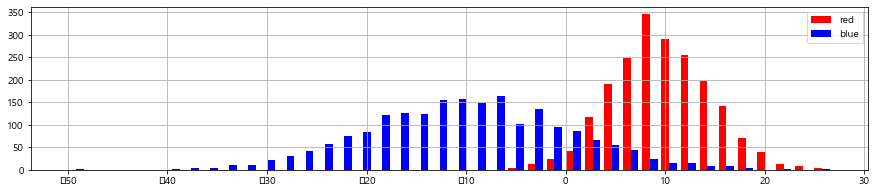

In [20]:
plt.hist(X, 40, color=colors, label=colors)
plt.legend()
plt.show()

In [21]:
X

array([[ 19.44574618, -14.42455118],
       [ 18.6691944 ,  -0.58296928],
       [  9.84852883, -29.15579392],
       ...,
       [  7.77794249,   0.9606134 ],
       [  1.01459007,  -7.8781981 ],
       [ 13.13711066, -28.82030385]])

## stacked

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   3.,  13.,  25.,  41., 117., 190., 249., 345., 290., 254.,
         198., 141.,  70.,  39.,  13.,   9.,   3.]),
  array([  1.,   0.,   0.,   0.,   0.,   1.,   4.,   3.,  10.,  11.,  22.,
          30.,  42.,  57.,  75.,  84., 121., 127., 125., 156., 158., 149.,
         163., 104., 148., 120., 127., 183., 245., 294., 370., 304., 270.,
         206., 149.,  74.,  39.,  14.,   9.,   5.])],
 array([-50.11049238, -48.18964894, -46.26880551, -44.34796207,
        -42.42711863, -40.50627519, -38.58543175, -36.66458831,
        -34.74374487, -32.82290143, -30.90205799, -28.98121455,
        -27.06037111, -25.13952767, -23.21868423, -21.29784079,
        -19.37699735, -17.45615392, -15.53531048, -13.61446704,
        -11.6936236 ,  -9.77278016,  -7.85193672,  -5.93109328,
         -4.01024984,  -2.0894064 ,  -0.16856296,   1.75228

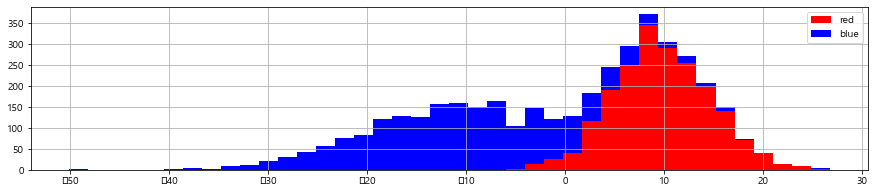

In [22]:
plt.hist(X, 40, color=colors, label=colors, stacked=True)
plt.legend()
plt.show()

## 하나에 그려보기 - 방법1

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.]),
  array([  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         264., 230., 152., 100.,  39.,  24.,  12.,   1.,   2.])],
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 Lists of Patches objects>)

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.]),
  array([  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         267., 268., 310., 539., 674., 476., 223.,  53.,  14.])],
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 Lists of Patches objects>)

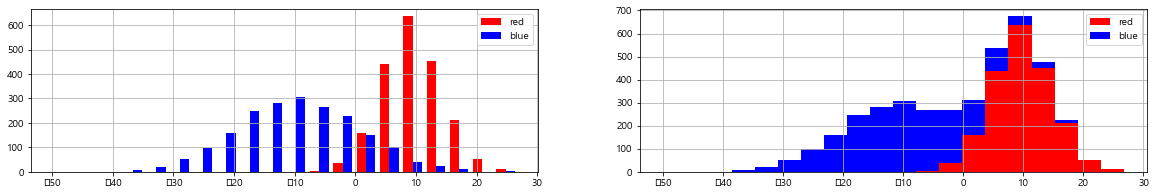

In [24]:
plt.rcParams["figure.figsize"] = (20,3)
plt.subplot(1,2,1)
plt.hist(X, 20, color=colors, label=colors)
plt.legend()

plt.subplot(1,2,2)
plt.hist(X, 20, color=colors, label=colors, stacked=True)
plt.legend()
plt.show()

## 하나에 그려보기 - 방법2

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.]),
  array([  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         264., 230., 152., 100.,  39.,  24.,  12.,   1.,   2.])],
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 Lists of Patches objects>)

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,  38., 158., 439., 635., 452., 211.,  52.,  12.]),
  array([  1.,   0.,   1.,   7.,  21.,  52.,  99., 159., 248., 281., 307.,
         267., 268., 310., 539., 674., 476., 223.,  53.,  14.])],
 array([-50.11049238, -46.26880551, -42.42711863, -38.58543175,
        -34.74374487, -30.90205799, -27.06037111, -23.21868423,
        -19.37699735, -15.53531048, -11.6936236 ,  -7.85193672,
         -4.01024984,  -0.16856296,   3.67312392,   7.5148108 ,
         11.35649768,  15.19818455,  19.03987143,  22.88155831,
         26.72324519]),
 <a list of 2 Lists of Patches objects>)

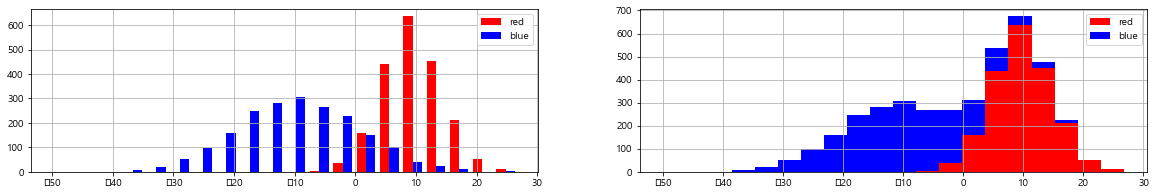

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(X, 20, color=colors, label=colors)
axes[0].legend()
axes[1].hist(X, 20, color=colors, label=colors, stacked=True)
axes[1].legend()
plt.show()

([array([  0.,   0., 506., 494.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  4.,  45.,  99., 198., 230., 197., 128.,  78.,  16.,   5.])],
 array([-11.47618909,  -7.49259416,  -3.50899924,   0.47459568,
          4.45819061,   8.44178553,  12.42538045,  16.40897538,
         20.3925703 ,  24.37616522,  28.35976015]),
 <a list of 2 Lists of Patches objects>)

([array([  0.,   0.,   0.,   0.,   0., 506., 494.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  2.,   2.,  15.,  30.,  45., 560., 589., 103., 119., 111., 109.,
          88.,  71.,  57.,  52.,  26.,  11.,   5.,   1.,   4.])],
 array([-11.47618909,  -9.48439162,  -7.49259416,  -5.5007967 ,
         -3.50899924,  -1.51720178,   0.47459568,   2.46639315,
          4.45819061,   6.44998807,   8.44178553,  10.43358299,
         12.42538045,  14.41717792,  16.40897538,  18.40077284,
         20.3925703 ,  22.38436776,  24.37616522,  26.36796269,
         28.35976015]),
 <a list of 2 Lists of Patches objects>)

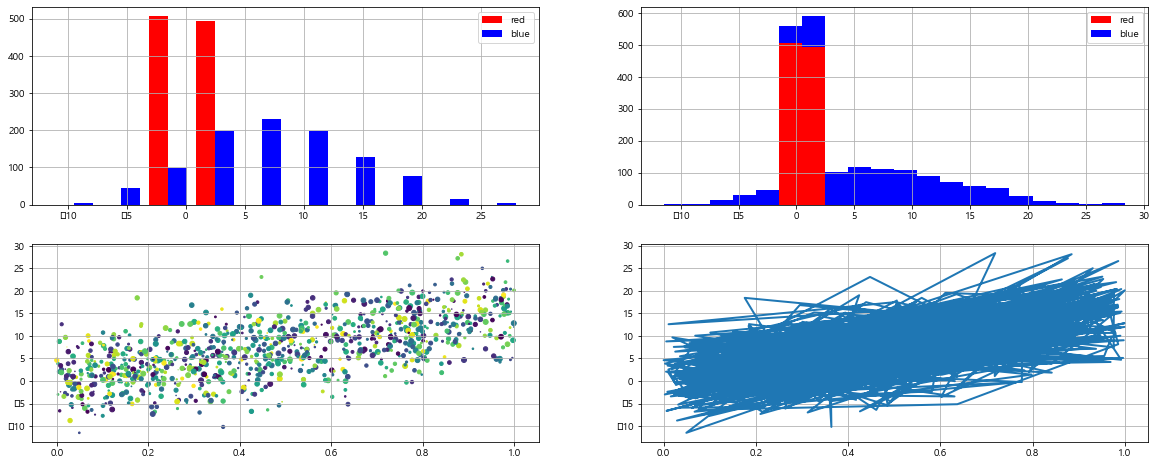

In [64]:
plt.rcParams["figure.figsize"] = (20,8)
N=1000
x1= np.random.rand(N).reshape(N,1)
x2= 15*x1 + 5*np.random.randn(N).reshape(N,1)
x = np.concatenate((x1, x2), axis=1)

area = 25*np.random.rand(N)
color = np.random.rand(N)
colors = ['red', 'blue']

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].hist(x, 10, color=colors, label=colors)
axes[0,0].legend()
axes[0,1].hist(x, 20, color=colors, label=colors, stacked=True)
axes[0,1].legend()

axes[1,0].scatter(x[:,0], x[:,1], s= area, c=color)
axes[1,1].plot(x[:,0], x[:,1])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c44edd2b48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c44f15ba08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c44f1526c8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c44f15bb88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c44f160c48>,
 'means': []}

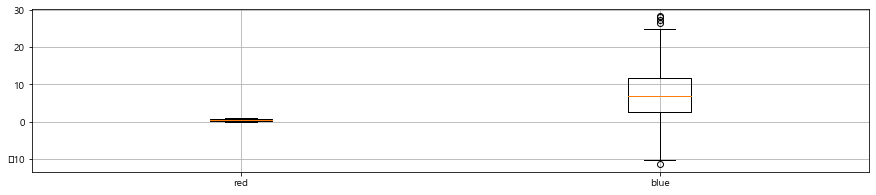

In [69]:
plt.rcParams["figure.figsize"] = (15,3)
plt.boxplot(x, labels=colors)
plt.show()

## pandas plot -line

count    1000.000000
mean        0.003470
std         0.971059
min        -2.895135
25%        -0.658386
50%        -0.009405
75%         0.637070
max         3.108154
dtype: float64

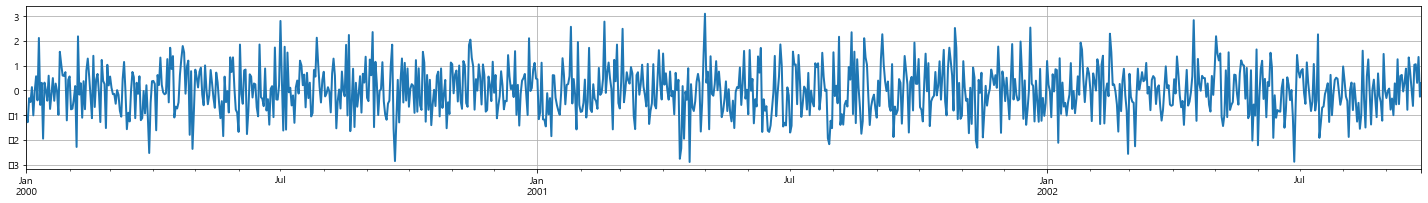

In [129]:
plt.rcParams["figure.figsize"] = (25,3)

N = 1000
ts = pd.Series(np.random.randn(N), index=pd.date_range('1/1/2000', periods =N))
ts.describe()
ts.plot()

count    1000.000000
mean        4.921648
std         6.491663
min       -11.423322
25%        -0.172707
50%         4.656614
75%         9.692415
max        21.077110
dtype: float64

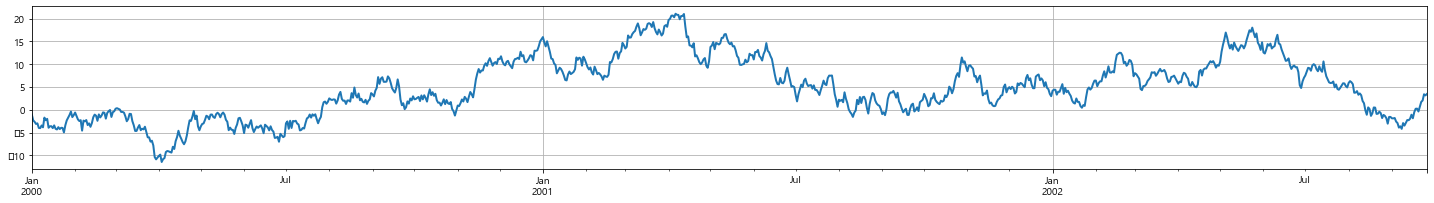

In [130]:
ts=ts.cumsum()
ts.describe()
ts.plot()

In [154]:
ts.index[0:4]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

,A,B,C,D
2000-01-01,0.716825,0.021202,0.782440,-0.516672
2000-01-02,-0.240075,-1.171245,0.952927,-0.536743
2000-01-03,-0.455629,0.178169,-0.891959,1.352953


<Figure size 1800x216 with 0 Axes>

,A,B,C,D
2000-01-01,0.716825,0.021202,0.782440,-0.516672
2000-01-02,0.476750,-1.150043,1.735367,-1.053414
2000-01-03,0.021122,-0.971874,0.843408,0.299539


<Figure size 1800x216 with 0 Axes>

<Figure size 1800x216 with 0 Axes>

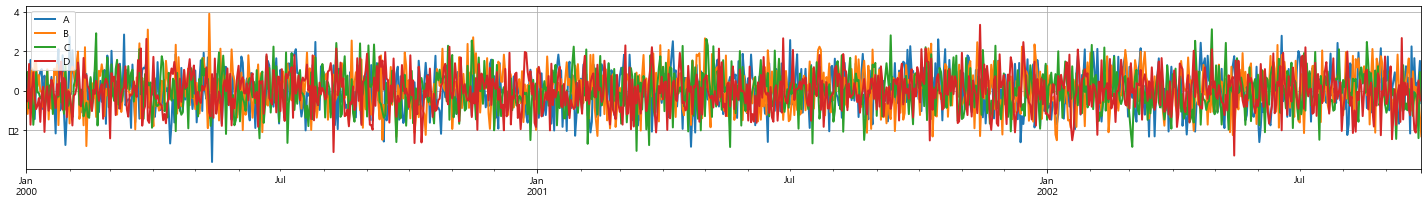

<Figure size 1800x216 with 0 Axes>

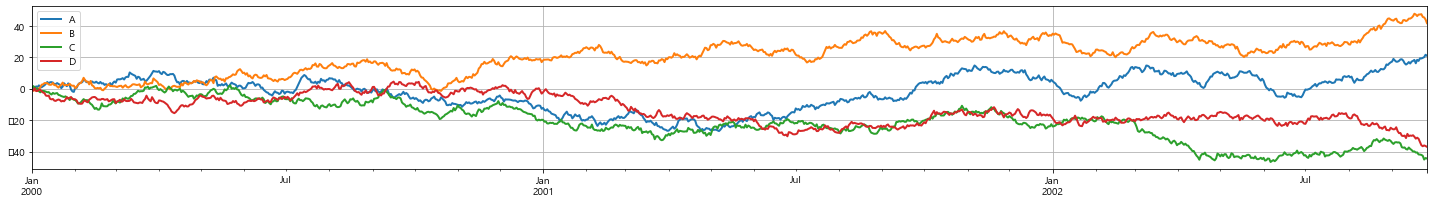

In [151]:
N = 1000
index = pd.Series(np.random.randn(N), index=pd.date_range('1/1/2000', periods =N)).index

df = pd.DataFrame(np.random.randn(N,4), index=index, columns=list('ABCD'))
df.head(3)
plt.figure()
df.plot()

df=df.cumsum()
df.head(3)
plt.figure()
df.plot()

## pandas plot - bar, 시간이 너무 걸려 데이터를 구분하여 보기

<Figure size 1800x216 with 0 Axes>

<Figure size 1800x216 with 0 Axes>

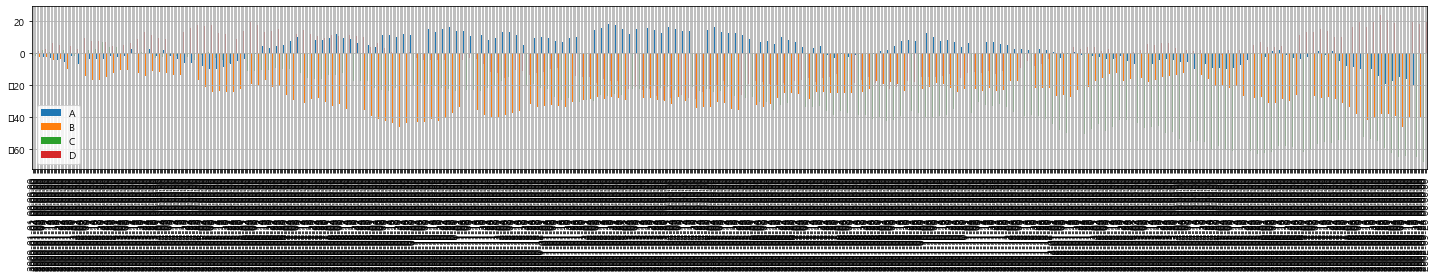

In [156]:
df = pd.DataFrame(np.random.randn(N,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot(kind='bar')

In [163]:
df.head()
df.shape
df.iloc[1]

,A,B,C,D
2000-01-01,0.917473,-0.847829,-1.096395,1.038779
2000-01-02,-1.842293,-1.582267,-2.640542,1.318491
2000-01-03,-1.634843,-1.812137,-1.879725,1.629289
2000-01-04,-0.103402,-2.696609,-1.471920,1.643070
2000-01-05,-0.312888,-2.592011,-1.301981,1.593142


(1000, 4)

A   -1.842293
B   -1.582267
C   -2.640542
D    1.318491
Name: 2000-01-02 00:00:00, dtype: float64

<Figure size 1800x216 with 0 Axes>

<Figure size 1800x216 with 0 Axes>

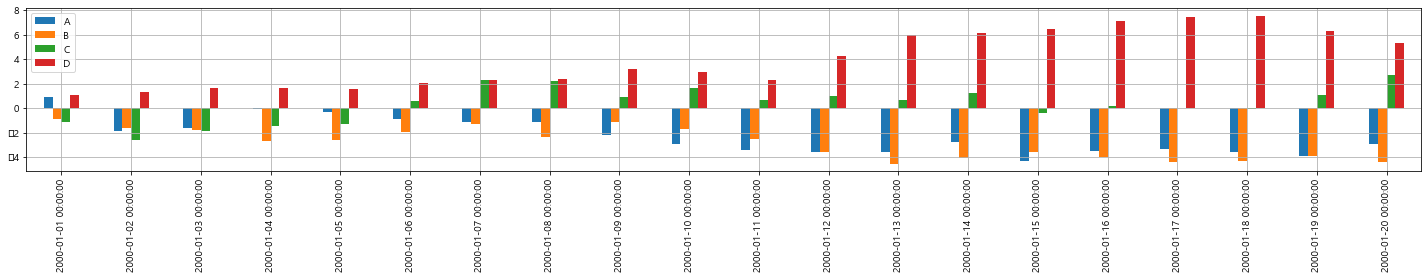

In [167]:
plt.figure()
df.iloc[0:20].plot(kind='bar')

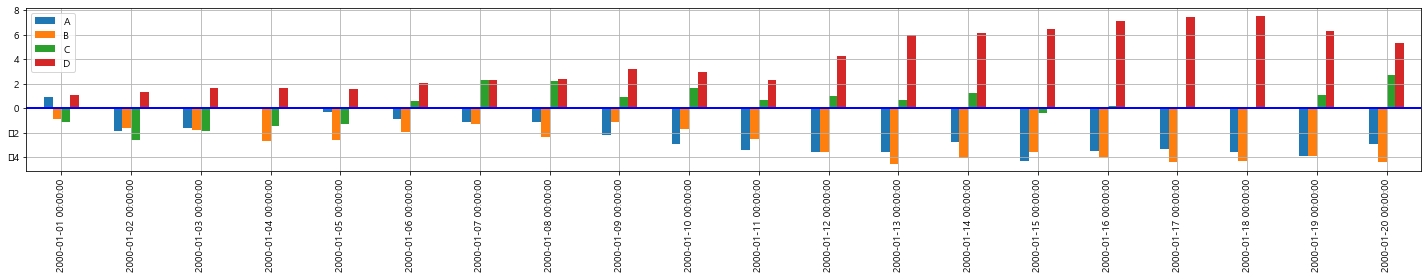

In [175]:
df.iloc[0:20].plot.bar()
plt.axhline(0, color='b')

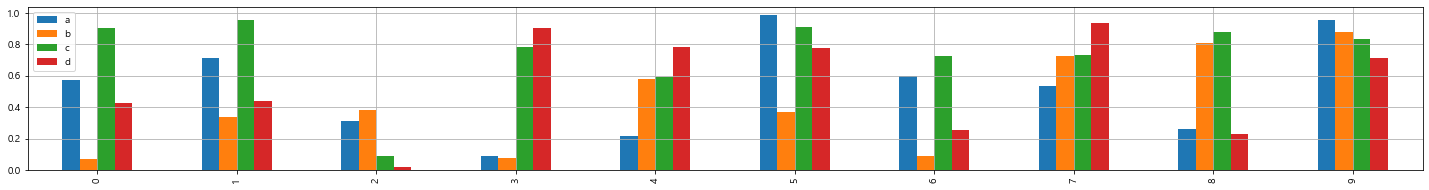

In [188]:
df = pd.DataFrame(np.random.rand(10,4), columns = ['a','b','c','d'])
df.plot.bar()

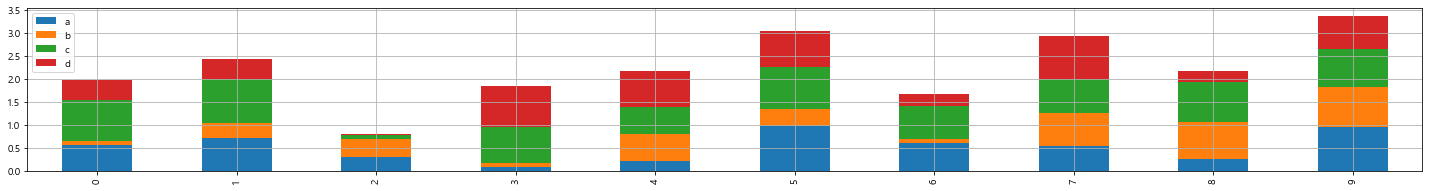

In [189]:
df.plot.bar(stacked=True)

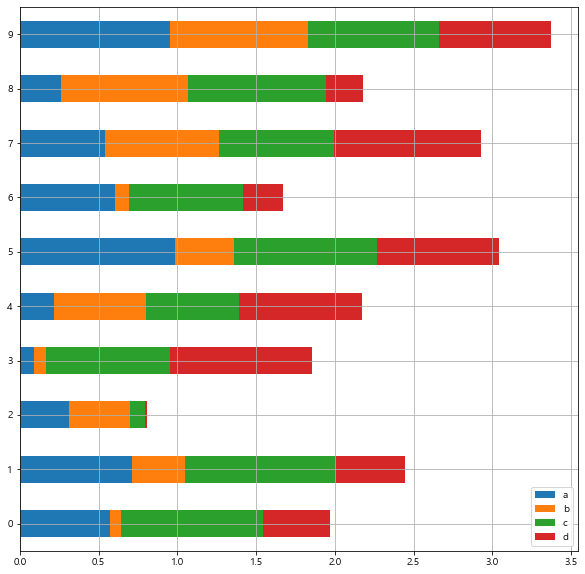

In [194]:
plt.rcParams["figure.figsize"] = (10,10)
df.plot.barh(stacked=True)

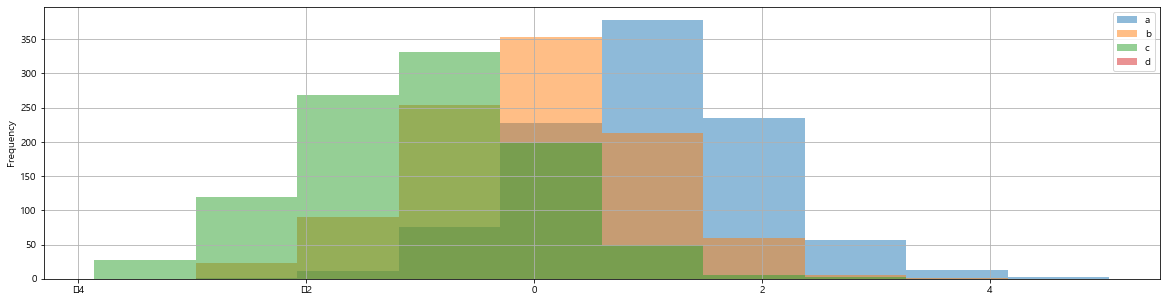

In [204]:
plt.rcParams["figure.figsize"] = (20,5)
df= pd.DataFrame({'a': np.random.randn(1000)+1,
                 'b': np.random.randn(1000),
                 'c': np.random.randn(1000)-1},
                 columns=['a', 'b', 'c', 'd'])

df.plot.hist(alpha= 0.5)

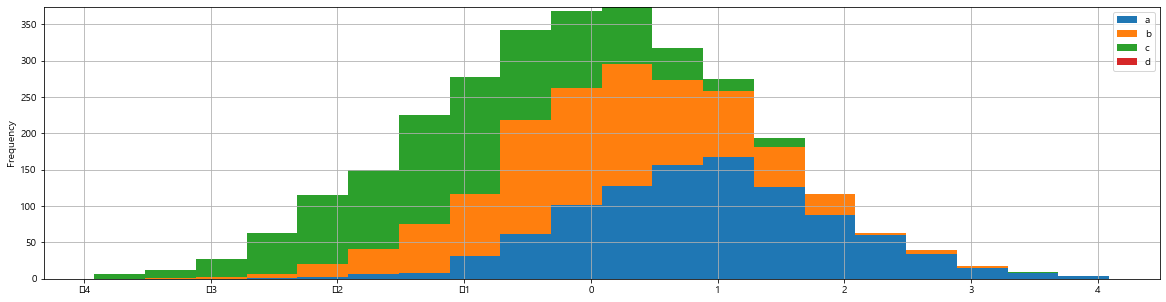

In [200]:
df.plot.hist(stacked = True, bins =20)

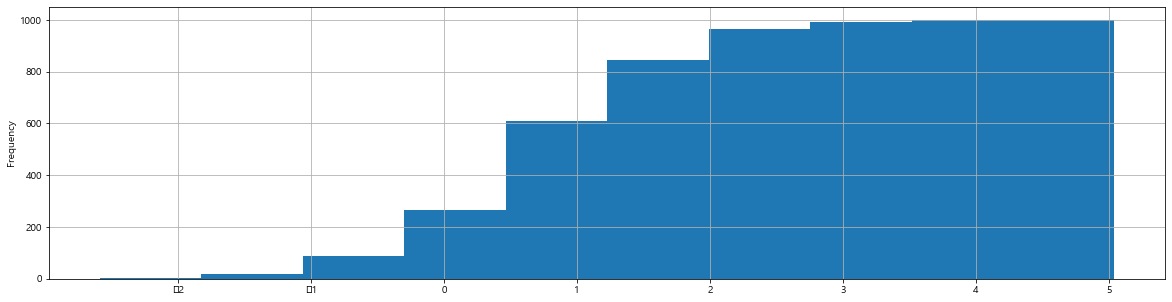

In [208]:
df['a'].plot.hist( cumulative=True)

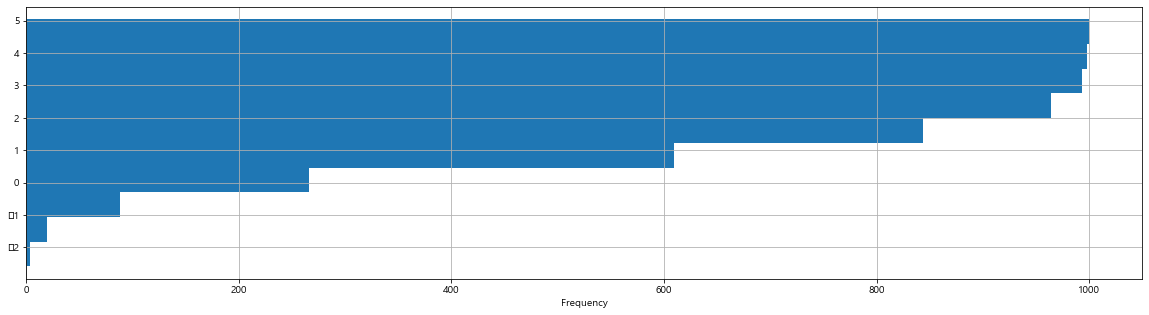

In [207]:
df['a'].plot.hist(orientation='horizontal', cumulative=True)

## pandas plot - box

In [214]:
list('ABCD')

['A', 'B', 'C', 'D']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4000E33C8>,
      dtype=object)

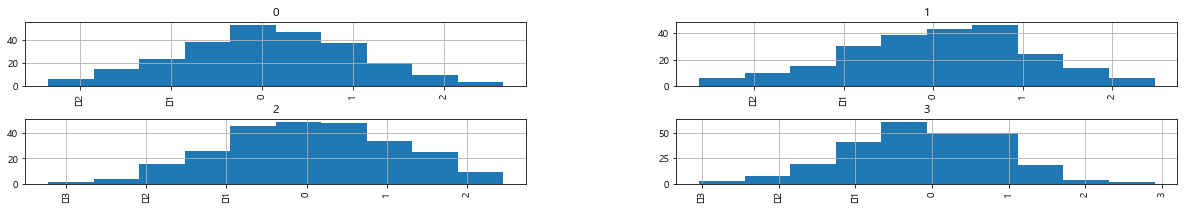

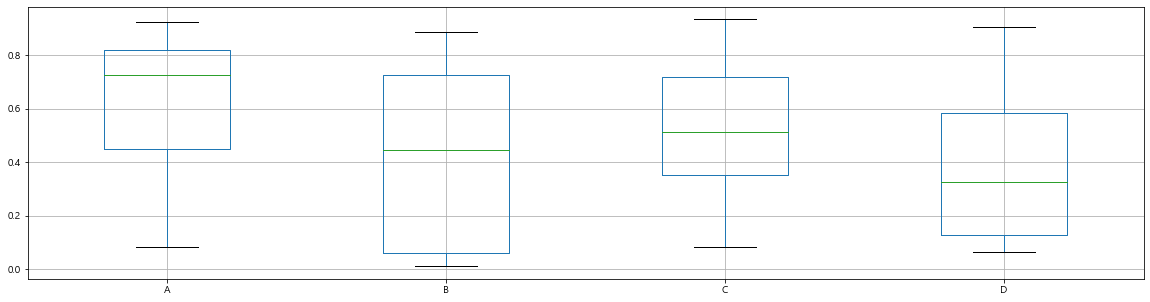

In [220]:
N =1000
df = pd.Series(np.random.randn(N))
df.hist(by =np.random.randint(0,4,N), figsize=(20,3))

df = pd.DataFrame(np.random.rand(10,4), columns=list('ABCD'))
df.plot.box()

## 실제 데이터 실습

## 파일 불러오기

In [70]:
BSN =  pd.read_pickle('working/BSN_LCNS_EXT.pkl') # 인허가및 폐업일자 형식 
CHC =  pd.read_pickle('working/CHCKACRST_EXT.pkl')

BSN = BSN[['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계']]
CHC = CHC[['영업_인허가_대장_번호', '지도점검년도', '점검결과', '점검', '위반', '점검 (n-1)', '위반 (n-1)',
       '점검 (n-2)', '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)', '위반 (n-4)',
       '점검 (n-5)', '위반 (n-5)']]

BSN.loc[:,'폐업_일자'] = BSN.loc[:,'폐업_일자'].apply(lambda x: 20201231 if x == 99999999 else x)
BSN.iloc[170625, 4] = '19001010'

BSN.허가_일자 = BSN.허가_일자.astype('int64')
BSN.loc[:,'허가_일자'] = BSN.loc[:,'허가_일자'].apply(lambda x: 19651024 if x < 11980699 else x)

In [71]:
def Notnull_null_unique(df) :
    
    startTime = time.time()
    df_notnull = pd.notnull(df).sum()
    df_null = pd.isnull(df).sum()
    df_unique = df.nunique()
    tf = pd.concat([pd.concat([df_notnull, df_null], axis=1), df_unique], axis=1).reset_index()
    tf = pd.DataFrame(tf.values, columns=['Feature_Name','Notnull','Null','Unique'])
    tf['Null rate'] = (tf['Null'] / (tf['Notnull'] + tf['Null']))*100
    tf = tf.sort_values(['Notnull', 'Null rate'], ascending = [False, False])
    #tf.to_excel('../working/Notnull_null_uniques.xlsx')
    endTime = time.time() - startTime
    print("--- %s seconds of running time---" % (endTime)) 
    
    return tf 

Notnull_null_unique(CHC)

--- 0.0913701057434082 seconds of running time---


,Feature_Name,Notnull,Null,Unique,Null rate
0,영업_인허가_대장_번호,185757,0,62068,0
1,지도점검년도,185757,0,12,0
2,점검결과,185757,0,2,0
3,점검,185757,0,25,0
4,위반,185757,0,6,0
5,점검 (n-1),79904,105853,22,56.9847
6,위반 (n-1),79904,105853,7,56.9847
7,점검 (n-2),58625,127132,21,68.44
8,위반 (n-2),58625,127132,7,68.44
9,점검 (n-3),42457,143300,19,77.1438


In [72]:
#exl = np.ones(len(CHC['지도점검년도'].value_counts())).tolist()
exl = np.zeros(len(CHC['지도점검년도'].value_counts())).tolist()
exl[-1] = 2
exl

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2]

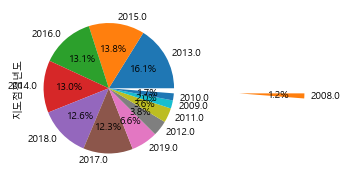

In [73]:
CHC['지도점검년도'].value_counts().plot.pie(autopct='%1.1f%%', explode= exl)

In [74]:
CHC.columns

Index(['영업_인허가_대장_번호', '지도점검년도', '점검결과', '점검', '위반', '점검 (n-1)', '위반 (n-1)',
       '점검 (n-2)', '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)', '위반 (n-4)',
       '점검 (n-5)', '위반 (n-5)'],
      dtype='object')

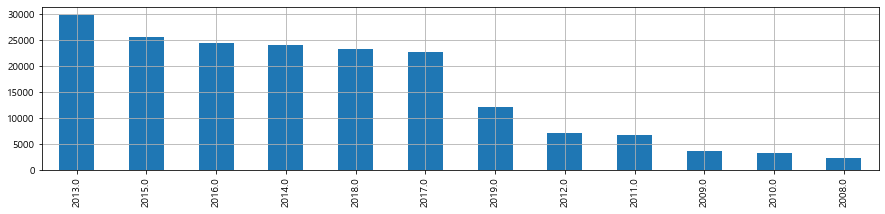

In [75]:
CHC['지도점검년도'].value_counts().plot.bar()

In [76]:
def manu_data () :  

    BSN =  pd.read_pickle('working/BSN_LCNS_EXT.pkl')
    BSN.허가_일자.sort_values().head(3)
    BSN.iloc[170625, 1] = 19001010
    BSN.허가_일자 = BSN.허가_일자.astype('int64')
    CHC =  pd.read_pickle('working/CHCKACRST_EXT.pkl')
    PRDC =  pd.read_pickle('working/PRDCTN_REPORT.pkl')
    PRDL =  pd.read_pickle('working/PRDLST_MNF_EXT.pkl')

    CHC = CHC.rename(columns={'지도점검년도':'년도'}) # merge, on =""
    PRDC = PRDC.rename(columns={'평가_년도':'년도'})
    PRDL = PRDL.rename(columns={'보고년도':'년도'})
    # 인허가+위생점검+생산실적1/2
    df= BSN.merge(CHC, on='영업_인허가_대장_번호').merge(PRDC, on=['영업_인허가_대장_번호','년도'],
                 how='left').merge(PRDL, on=['영업_인허가_대장_번호','년도'], how='left')
    df = df.drop(['보고품목수_y', '냉동_y', '일반_y'], axis=1) # 중복 col 제거, 제조가공단계
    
    return df

data = manu_data()

In [77]:
data.columns

Index(['영업_인허가_대장_번호', '허가_일자', '폐업_일자', '위도', '경도', '영업소재지', '업종코드', '단계',
       '임대_여부', '자가검사', '보고품목수_보고여부', '생산품목수_보고여부', '영업장면적_보고여부', '종업원수_보고여부',
       '국내판매액_보고여부', '해외판매액_보고여부', '보고품목수_x', '생산품목수', '영업장면적', '종업원수',
       '국내판매액', '해외판매액', '보고품목수_백분위', '생산품목수_백분위', '영업장면적_백분위', '종업원수_백분위',
       '국내판매액_백분위', '해외판매액_백분위', '보고품목수_등급', '생산품목수_등급', '영업장면적_등급', '종업원수_등급',
       '국내판매액_등급', '해외판매액_등급', '강수량', '평균기온', '최저기온', '최고기온', '평균습도',
       '점검원인_유형코드', '수행_기관코드', '년도', '점검결과', '점검', '위반', '점검 (n-1)',
       '위반 (n-1)', '점검 (n-2)', '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)',
       '위반 (n-4)', '점검 (n-5)', '위반 (n-5)', '직원수합계', '연간생산능력', '생산금액', '생산량',
       'HACCP_여부_Y', '냉동_x', '레토르트', '일반_x', '통병조림', 'OEM', '대표자유지', '소재지유지',
       '업종유지', '직원수합계_변화', '보고품목수_변화', '연간생산능력_변화', '생산금액_변화', '생산량_변화', '보고수',
       '냉장', '상온|실온', '진공', 'B01', 'C01', 'C02', 'C03', 'ETC'],
      dtype='object')

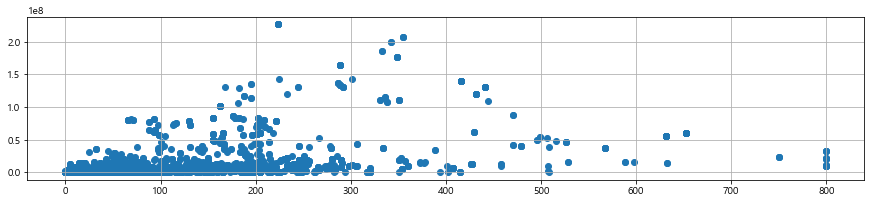

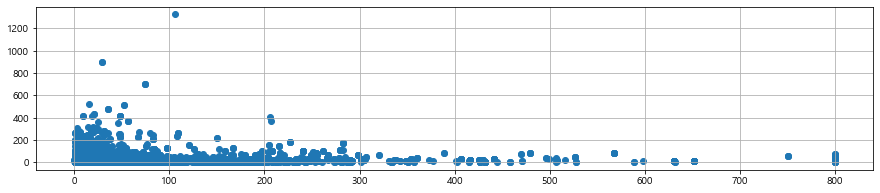

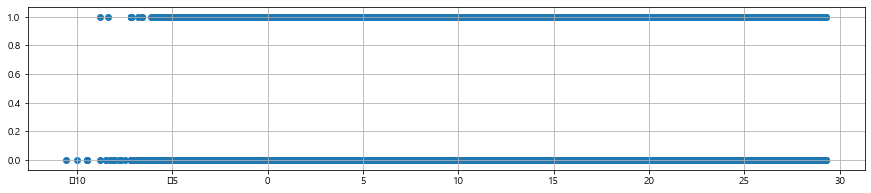

In [78]:
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['직원수합계'], data['생산량'])
plt.show()

plt.scatter(data['직원수합계'], data['보고수'])
plt.show()

plt.scatter(data['평균기온'], data['점검결과'])
plt.show()

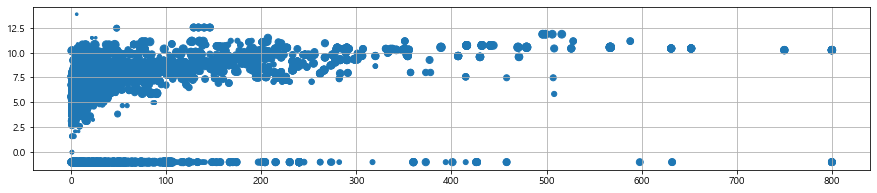

In [79]:
plt.scatter(data['직원수합계'], data['영업장면적'],  s = data['생산품목수']*10)
plt.show()

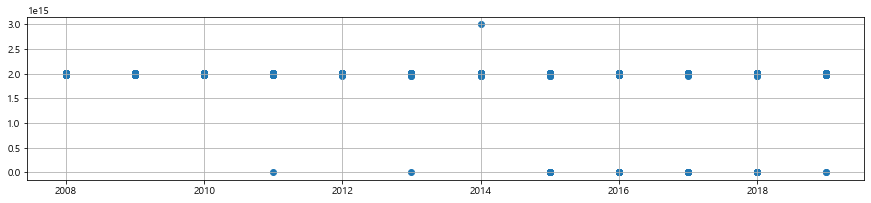

In [80]:
plt.scatter(CHC['지도점검년도'], CHC['영업_인허가_대장_번호'])
plt.show()

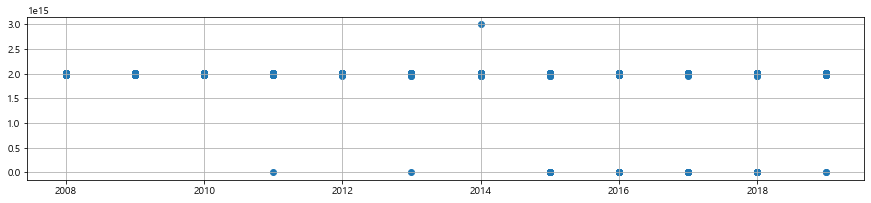

In [81]:
plt.scatter(CHC['지도점검년도'], CHC['영업_인허가_대장_번호'])
plt.show()

## X1과 X2의 shape이 달라 따로 한꺼번에 그리기 어려워.. 같이그려야 함

In [82]:
bad = data[data.점검결과 ==1]; good = data[data.점검결과 ==0]
colors =['red', 'blue']
data.shape, bad.shape, good.shape, round(len(bad)/len(data)*100, 2)

((185758, 82), (15284, 82), (170474, 82), 8.23)

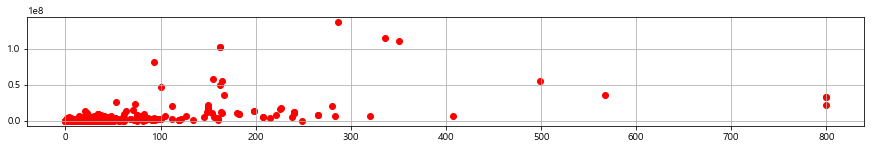

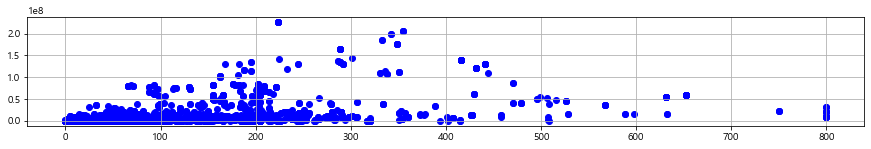

In [83]:
plt.rcParams["figure.figsize"] = (15,2)
plt.scatter(bad['직원수합계'], bad['생산량'], color ='red')
plt.show()
plt.scatter(good['직원수합계'], good['생산량'], color ='blue')
plt.show()

직원수와생산량
******************************************************************************************************************************************************


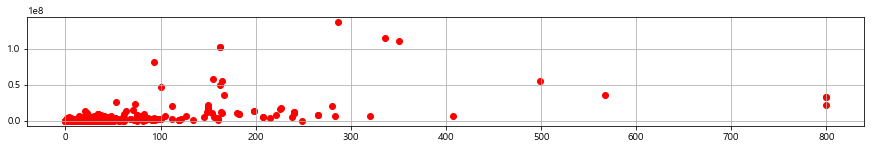

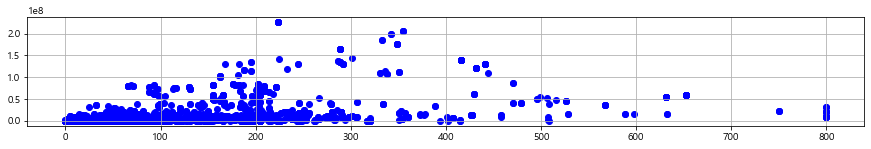

******************************************************************************************************************************************************
직원수와보고수
******************************************************************************************************************************************************


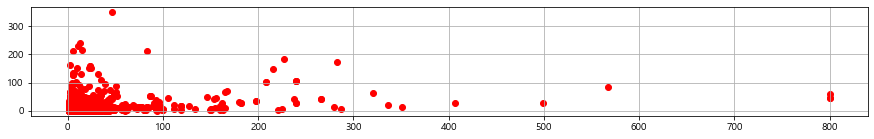

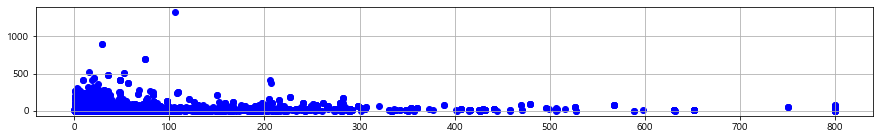

******************************************************************************************************************************************************


In [84]:
for i in ['생산량', '보고수'] :
    print('직원수와{}'.format(i))
    print('*'*150)
    plt.rcParams["figure.figsize"] = (15,2)
    plt.scatter(bad['직원수합계'], bad[i], color ='red')
    plt.show()
    plt.scatter(good['직원수합계'], good[i], color ='blue')
    plt.show()
    print('*'*150)

## End